<a href="https://colab.research.google.com/github/toms-github-portfolio/Python_H2O_Machine_Learning/blob/main/Python_H2O_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=0289d81f125067fa9fd848daa3df31e5f07dbf96db23b577f22da395f9fe4df4
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdn3cgx56
  JVM stdout: /tmp/tmpdn3cgx56/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdn3cgx56/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_pypocb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# This data set seems to be about glass installation and how different x variables affect the heating / cooling load (y variables)

# X1: relative compactness
# X2: surface area
# X3: wall area
# X4: roof area
# X5: overall height
# X6: orientation
# X7: glazing area
# X8: glazing area distribution

# Y1: heating load
# Y2: cooling load

In [ ]:
#If next line fails, instead set path to location of datasets / i imported it into collab and that worked.

# Import the dataset with the full path
data = h2o.import_file("/ENB2012_data.csv")

# Convert selected columns to factors (categorical variables)
factorsList = ["X6","X8"]
data[factorsList] = data[factorsList].asfactor()

# Split the data into training and testing sets - 10% to 90%
train, test = data.split_frame([0.9])

# Specify predictor variables (features)
x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]

# Specify response variable (target)
y = "Y1"  #Or "Y2" - using the heating load

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
display([data])

[  X1     X2     X3      X4    X5    X6    X7    X8     Y1     Y2
----  -----  -----  ------  ----  ----  ----  ----  -----  -----
0.98  514.5  294    110.25     7     2     0     0  15.55  21.33
0.98  514.5  294    110.25     7     3     0     0  15.55  21.33
0.98  514.5  294    110.25     7     4     0     0  15.55  21.33
0.98  514.5  294    110.25     7     5     0     0  15.55  21.33
0.9   563.5  318.5  122.5      7     2     0     0  20.84  28.28
0.9   563.5  318.5  122.5      7     3     0     0  21.46  25.38
0.9   563.5  318.5  122.5      7     4     0     0  20.71  25.16
0.9   563.5  318.5  122.5      7     5     0     0  19.68  29.6
0.86  588    294    147        7     2     0     0  19.5   27.3
0.86  588    294    147        7     3     0     0  19.95  21.97
[768 rows x 10 columns]
]

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [ ]:
# Creating and training the MLR model
mlr_model = H2OGeneralizedLinearEstimator(model_id="mlr_model", family="gaussian")
mlr_model.train(x=x, y=y, training_frame=train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: mlr_model


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.0182 )  16                            12                             1                       py_7_sid_bafd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 8.028488788347097
RMSE: 2.8334588030086296
MAE: 2.0462921840688337
RMSLE: 0.11907854524155582
Mean Residual Deviance: 8.028488788347097
R^2: 0.9230109437950859
Null degrees of freedom: 689
Residual degrees of freedom: 677
Null deviance: 71953.82742730662
Residual deviance: 5539.657263959497
AIC: 3423.402632844685

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  ------------------
    2024-01-27 03:52:34  0.000 sec   0             71953.82727768121          104.28090909808871
    2024-01-27 03:52:34  0.162 sec   1                                                            2.8334588030086296  8.028488788347097    2.0462921840688337  0.9230109437950859

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
X5          7.96579                1                    0.359298
X8.0        3.49509                0.438763             0.157646
X1          2.94741                0.370009             0.132943
X7          2.29758                0.288431             0.103633
X4          2.18653                0.27449              0.0986235
X3          1.32374                0.166178             0.0597074
X2          1.11758                0.140297             0.0504084
X8.1        0.409563               0.0514153            0.0184734
X8.2        0.220519               0.0276833            0.00994655
X8.4        0.119234               0.0149683            0.00537806
X6.4        0.047502               0.00596325           0.00214258
X8.5        0.0399086              0.00501              0.00180008
X8.3        0                      0                    0
X6.2        0                      0                    0
X6.3        0                      0                    0
X6.5        0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Creating the MLR Model Object:

mlr_model = H2OGeneralizedLinearEstimator(model_id="mlr_model", family="gaussian"): Here, you are creating an instance of the H2OGeneralizedLinearEstimator class, which is a class provided by H2O for building generalized linear models.
The model_id parameter is used to assign a unique identifier to the model, in this case, "mlr_model".
The family parameter is set to "gaussian", indicating that you are building a model for a continuous response variable, which aligns with the nature of Multiple Linear Regression.
Training the MLR Model:

mlr_model.train(x=x, y=y, training_frame=train): This line of code is training the MLR model on the training dataset (train).
x is a list containing the names of predictor variables. In this case, it includes ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"].
y is the response variable. In this case, it is "Y2" (or you can use "Y1" depending on your specific use case).
The training_frame parameter specifies the training dataset.
After this code is executed, the mlr_model object will be a trained MLR model that you can use to make predictions on new data or analyze the model's performance. The print(mlr_model) statement is used to display the summary of the trained model, including information about the coefficients, performance metrics, and other relevant details.


In [ ]:
# Displaying the model summary
print(mlr_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: mlr_model


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.0182 )  16                            12                             1                       py_7_sid_bafd

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 8.028488788347097
RMSE: 2.8334588030086296
MAE: 2.0462921840688337
RMSLE: 0.11907854524155582
Mean Residual Deviance: 8.028488788347097
R^2: 0.9230109437950859
Null degrees of freedom: 689
Residual degrees of freedom: 677
Null deviance: 71953.82742730662
Residual deviance: 5539.657263959497
AIC: 3423.402632

In [ ]:
# Making predictions on the test set
predictions = mlr_model.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Displaying predicted values
print(predictions)

  predict
 21.2787
 23.003
 24.761
  3.11723
 26.9097
 26.8622
 26.9097
 27.5728
 27.5728
 10.0166
[78 rows x 1 column]



In [ ]:
# Visualizing model coefficients
coefficients_table = mlr_model._model_json['output']['coefficients_table']
print(coefficients_table)


Coefficients: glm coefficients
names      coefficients    standardized_coefficients
---------  --------------  ---------------------------
Intercept  23.7219         22.4794
X8.0       -3.49509        -3.49509
X8.1       0.409563        0.409563
X8.2       0.220519        0.220519
X8.3       0               0
X8.4       0.119234        0.119234
X8.5       0.0399086       0.0399086
X6.2       0               0
X6.3       0               0
X6.4       -0.047502       -0.047502
X6.5       0               0
X1         -28.2345        -2.94741
X2         -0.0128134      -1.11758
X3         0.0300123       1.32374
X4         -0.0485222      -2.18653
X5         4.5486          7.96579
X7         17.2631         2.29758


In [ ]:
#This code extracts and prints the coefficients table from the model output.
#It helps us understand the impact of each predictor variable on the response variable.
# From my understanding the x8.0 or x8.1 etc are different circumstances / data recordings

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


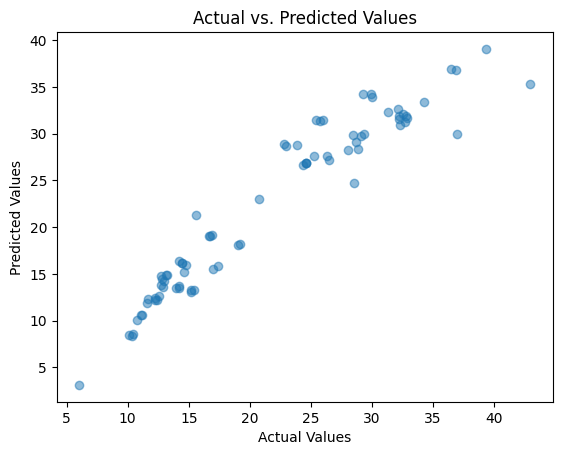

In [ ]:
# Scatter plot of predicted vs. actual values
import matplotlib.pyplot as plt
plt.scatter(test[y].as_data_frame(), predictions.as_data_frame(), alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Alpha Parameter: The alpha parameter sets the transparency of the points.
# A value of 0.5 means that the points will be semi-transparent, making it easier to visualize overlapping points.

In [ ]:
# Ideally, the points should form a diagonal line, indicating a strong correlation between predicted and actual values.
# If there are deviations from the diagonal, it may suggest areas where the model could be improved.
# In this case, there appears to be a strong correlation between the actual and predicted values

Hyperparamater Tunning

In [ ]:
# Unlike model parameters, which are learned during training, hyperparameters are set prior to training and influence the learning process.
from h2o.estimators import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
# Grid search for hyperparameter tuning
hyperparameters = {"alpha": [0.01, 0.1, 0.3], "lambda": [0.1, 0.01, 0.001]}
grid = H2OGridSearch(H2OGeneralizedLinearEstimator(family="gaussian"),
                     grid_id="grid_model",
                     hyper_params=hyperparameters)
grid.train(x=x, y=y, training_frame=train)
print(grid)


glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing residual_deviance
    alpha    lambda    model_ids           residual_deviance
--  -------  --------  ------------------  -------------------
    0.3      0.001     grid_model_model_9  5389.15
    0.1      0.001     grid_model_model_8  5390.16
    0.01     0.001     grid_model_model_7  5390.65
    0.3      0.01      grid_model_model_6  5477.49
    0.1      0.01      grid_model_model_5  5499.09
    0.01     0.01      grid_model_model_4  5509.29
    0.3      0.1       grid_model_model_3  6670.79
    0.1      0.1       grid_model_model_2  6815.47
    0.01     0.1       grid_model_model_1  6871.89


In [ ]:
#If next line fails, instead set path to location of datasets / i imported it into collab and that worked.

# Import the dataset with the full path
data = h2o.import_file("/ENB2012_data.csv")

# Convert selected columns to factors (categorical variables)
factorsList = ["X6","X8"]
data[factorsList] = data[factorsList].asfactor()

# Split the data into training and testing sets - 10% to 90%
train, test = data.split_frame([0.7])

# Specify predictor variables (features)
x = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8"]

# Specify response variable (target)
y = "Y1"  #Or "Y2" - using the heating load

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
display([data])

[  X1     X2     X3      X4    X5    X6    X7    X8     Y1     Y2
----  -----  -----  ------  ----  ----  ----  ----  -----  -----
0.98  514.5  294    110.25     7     2     0     0  15.55  21.33
0.98  514.5  294    110.25     7     3     0     0  15.55  21.33
0.98  514.5  294    110.25     7     4     0     0  15.55  21.33
0.98  514.5  294    110.25     7     5     0     0  15.55  21.33
0.9   563.5  318.5  122.5      7     2     0     0  20.84  28.28
0.9   563.5  318.5  122.5      7     3     0     0  21.46  25.38
0.9   563.5  318.5  122.5      7     4     0     0  20.71  25.16
0.9   563.5  318.5  122.5      7     5     0     0  19.68  29.6
0.86  588    294    147        7     2     0     0  19.5   27.3
0.86  588    294    147        7     3     0     0  19.95  21.97
[768 rows x 10 columns]
]

In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [ ]:
# Making predictions on the test set
predictions = mlr_model.predict(test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Displaying predicted values
print(predictions)

  predict
 21.3494
 23.0843
 21.7075
 21.7693
 23.3269
 24.5486
 28.7664
 28.729
 28.729
  3.36064
[238 rows x 1 column]



In [ ]:
# Visualizing model coefficients
coefficients_table = mlr_model._model_json['output']['coefficients_table']
print(coefficients_table)

Coefficients: glm coefficients
names      coefficients    standardized_coefficients
---------  --------------  ---------------------------
Intercept  24.4627         22.3197
X8.0       -3.31714        -3.31714
X8.1       0.515079        0.515079
X8.2       0               0
X8.3       0.0678624       0.0678624
X8.4       0.232557        0.232557
X8.5       0.072845        0.072845
X6.2       0.0373583       0.0373583
X6.3       -0.0617375      -0.0617375
X6.4       0               0
X6.5       0               0
X1         -27.4149        -2.89692
X2         -0.0135237      -1.18734
X3         0.0323398       1.42442
X4         -0.0510445      -2.30663
X5         4.30687         7.54366
X7         17.0226         2.26052


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


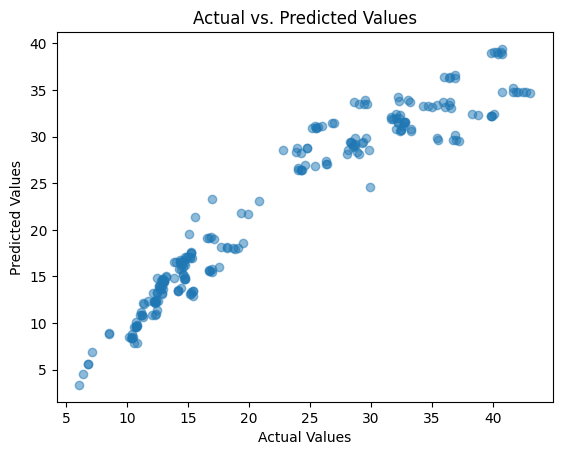

In [ ]:
# Scatter plot of predicted vs. actual values
import matplotlib.pyplot as plt
plt.scatter(test[y].as_data_frame(), predictions.as_data_frame(), alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Alpha Parameter: The alpha parameter sets the transparency of the points.
# A value of 0.5 means that the points will be semi-transparent, making it easier to visualize overlapping points.

In [ ]:
# Grid search for hyperparameter tuning
hyperparameters = {"alpha": [0.01, 0.1, 0.3], "lambda": [0.1, 0.01, 0.001]}
grid = H2OGridSearch(H2OGeneralizedLinearEstimator(family="gaussian"),
                     grid_id="grid_model",
                     hyper_params=hyperparameters)
grid.train(x=x, y=y, training_frame=train)
print(grid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     alpha    lambda    model_ids            residual_deviance
---  -------  --------  -------------------  -------------------
     0.3      0.001     grid_model_model_18  4033.88439815727
     0.1      0.001     grid_model_model_17  4034.7761844908455
     0.05     0.001     grid_model_model_16  4035.011653225643
     0.01     0.001     grid_model_model_28  4035.203198902387
     0.3      0.01      grid_model_model_15  4103.080264028298
     0.1      0.01      grid_model_model_14  4118.028467455122
     0.05     0.01      grid_model_model_13  4121.879746238957
     0.01     0.01      grid_model_model_25  4124.998482857503
     0.3      0.07      grid_model_model_24  4683.55546406914
     0.1      0.07      grid_model_model_23  4771.6577595639765
---  ---      ---       ---                  ---
     0.01     0.1       gr